`anjl` is a Python package providing fast implementations of the [neighbour-joining algorithm](https://en.wikipedia.org/wiki/Neighbor_joining) of Saitou and Nei and some associated utilities.

# Installation

`anjl` is available from [PyPI](https://pypi.org/project/anjl/) and can be installed via pip, e.g.:

In [ ]:
%pip install anjl

# Demo

In [1]:
import plotly.io

plotly.io.renderers.default = "notebook_connected+plotly_mimetype"

In [2]:
import anjl

`anjl` requires a numpy array containing a square distance matrix as input. Optionally, `anjl` can also make use of a pandas DataFrame containing data about the original observations.

Load some demo data to try it out:

In [3]:
D, leaf_data = anjl.data.mosquitoes()

`D` is a square distance matrix containing genetic distances between mosquitoes:

In [4]:
D

array([[ 0., 69., 74., ..., 68., 65., 65.],
       [69.,  0., 75., ..., 73., 76., 70.],
       [74., 75.,  0., ..., 56., 69., 69.],
       ...,
       [68., 73., 56., ...,  0., 59., 63.],
       [65., 76., 69., ..., 59.,  0., 68.],
       [65., 70., 69., ..., 63., 68.,  0.]], dtype=float32)

In [5]:
D.shape

(181, 181)

`leaf_data` contains additional data about the mosquitoes:

In [6]:
leaf_data.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,admin1_name,admin1_iso,admin2_name,taxon,cohort_admin1_year,cohort_admin1_month,cohort_admin1_quarter,cohort_admin2_year,cohort_admin2_month,cohort_admin2_quarter
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,11.151,-4.235,F,...,Hauts-Bassins,BF-09,Houet,gambiae,BF-09_gamb_2012,BF-09_gamb_2012_07,BF-09_gamb_2012_Q3,BF-09_Houet_gamb_2012,BF-09_Houet_gamb_2012_07,BF-09_Houet_gamb_2012_Q3
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana Village,2012,7,11.233,-4.472,F,...,Hauts-Bassins,BF-09,Houet,coluzzii,BF-09_colu_2012,BF-09_colu_2012_07,BF-09_colu_2012_Q3,BF-09_Houet_colu_2012,BF-09_Houet_colu_2012_07,BF-09_Houet_colu_2012_Q3


Compute a neighbour-joining tree from the given distance matrix, using the rapid algorithm:

In [7]:
Z = anjl.dynamic_nj(D)

The return value `Z` is a numpy array containing an encoding of the resulting tree.

Create an interactive plot to visualise the tree:

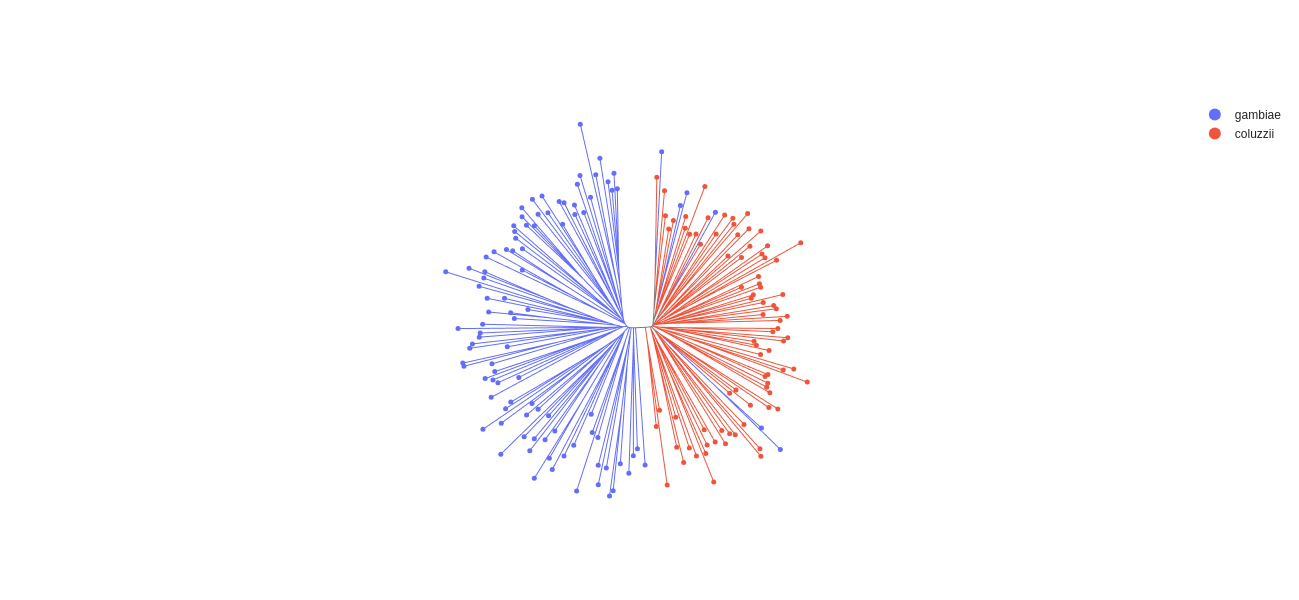

In [8]:
anjl.plot(
    Z,
    leaf_data=leaf_data,
    color="taxon",
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
)

This plot is rendered using plotly and is interactive -
try hovering over leaf nodes for more information, pan and zoom, or click on the legend to hide or show items.

# Benchmark

Here is a performance comparison between `anjl` and other currently available implementations of neighbour-joining in Python. 

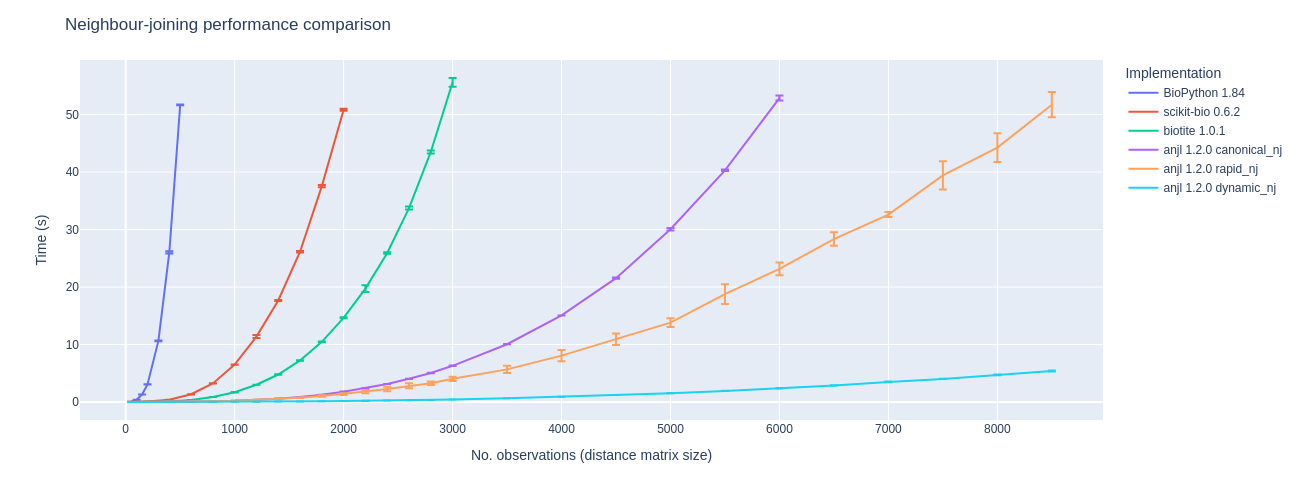

In [10]:
import pandas as pd
import plotly.express as px

df_results = pd.read_csv("../benchmark/results.csv")
df_plot = (
    df_results.groupby(["implementation", "size"])
    .agg(
        time_mean=("time", "mean"),
        time_std=("time", "std"),
    )
    .reset_index()
)
fig = px.line(
    df_plot,
    x="size",
    y="time_mean",
    error_y="time_std",
    width=700,
    height=500,
    color="implementation",
    category_orders=dict(
        implementation=[
            "BioPython 1.84",
            "scikit-bio 0.6.2",
            "biotite 1.0.1",
            "anjl 1.2.0 canonical_nj",
            "anjl 1.2.0 rapid_nj",
            "anjl 1.2.0 dynamic_nj",
        ]
    ),
)
fig.update_layout(
    title="Neighbour-joining performance comparison",
    xaxis_title="No. observations (distance matrix size)",
    yaxis_title="Time (s)",
    legend_title="Implementation",
)
fig

This benchmark was run on pairwise genetic distances between mosquitoes using data from the [Malaria Vector Genome Observatory](https://malariagen.net/vobs). The source data is available [here](https://github.com/alimanfoo/anjl/tree/main/benchmark/xxl).

# API

## Dynamic neighbour-joining

In [11]:
anjl.dynamic_nj?

Signature:
anjl.dynamic_nj(
    D: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]],
    disallow_negative_distances: bool = True,
    progress: Optional[Callable] = None,
    progress_options: collections.abc.Mapping = {},
) -> numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]
Docstring:
@@TODO.

@@TODO.

Parameters
----------
D : ndarray[Any, dtype[_ScalarType_co]]
    A distance matrix in square form.
disallow_negative_distances : bool, optional, default: True
    If True, set any negative distances to zero.
progress : Callable or None, optional
    A function which will be used to wrap the main loop iterator to
    provide information on progress. E.g., could be tqdm.
progress_options : Mapping, optional, default: {}
    Any options to be passed into the progress function.

Returns
-------
ndarray[Any, dtype[float32]]
    A neighbour-joining tree encoded as a numpy array. Each row in the
    array contains data for one internal node in the tree, in the order
    in which

## Rapid neighbour-joining

In [12]:
anjl.rapid_nj?

Signature:
anjl.rapid_nj(
    D: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]],
    disallow_negative_distances: bool = True,
    progress: Optional[Callable] = None,
    progress_options: collections.abc.Mapping = {},
    gc: int | None = 100,
) -> numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]
Docstring:
Perform neighbour-joining using an algorithm based on Simonsen et al.
[1]_.

This implementation builds and maintains a sorted copy of the distance
matrix and uses heuristics to avoid searching pairs that cannot possibly
be neighbours in each iteration. In the worst case it has complexity
O(n^3) like the canonical algorithm but in practice it usually scales
closer to O(n^2).

Parameters
----------
D : ndarray[Any, dtype[_ScalarType_co]]
    A distance matrix in square form.
disallow_negative_distances : bool, optional, default: True
    If True, set any negative distances to zero.
progress : Callable or None, optional
    A function which will be used to wrap the mai

## Canonical neighbour-joining

In [13]:
anjl.canonical_nj?

Signature:
anjl.canonical_nj(
    D: numpy.ndarray[typing.Any, numpy.dtype[+_ScalarType_co]],
    disallow_negative_distances: bool = True,
    progress: Optional[Callable] = None,
    progress_options: collections.abc.Mapping = {},
) -> numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]]
Docstring:
Perform neighbour-joining using the canonical algorithm.

This implementation performs a full scan of the distance matrix in each
iteration of the algorithm to find the pair of nearest neighbours. It is
therefore slower and scales with the cube of the number of original
observations in the distance matrix, i.e., O(n^3).

Parameters
----------
D : ndarray[Any, dtype[_ScalarType_co]]
    A distance matrix in square form.
disallow_negative_distances : bool, optional, default: True
    If True, set any negative distances to zero.
progress : Callable or None, optional
    A function which will be used to wrap the main loop iterator to
    provide information on progress. E.g., could be tqdm.
p

## Plotting

In [14]:
anjl.plot?

Signature:
anjl.plot(
    Z: numpy.ndarray[typing.Any, numpy.dtype[numpy.float32]],
    leaf_data: pandas.core.frame.DataFrame | None = None,
    color: str | None = None,
    symbol: str | None = None,
    hover_name: str | None = None,
    hover_data: list[str] | None = None,
    center_x: int | float = 0,
    center_y: int | float = 0,
    arc_start: int | float = 0,
    arc_stop: int | float = 6.283185307179586,
    count_sort: bool = True,
    distance_sort: bool = False,
    line_width: int | float = 1,
    marker_size: int | float = 5,
    internal_marker_size: int | float = 0,
    color_discrete_sequence: list | None = None,
    color_discrete_map: collections.abc.Mapping | None = None,
    category_orders: list | collections.abc.Mapping | None = None,
    leaf_legend: bool = True,
    edge_legend: bool = False,
    default_line_color: str = 'gray',
    na_color: str = 'black',
    width: int | float | None = 700,
    height: int | float | None = 600,
    render_mode: Literal['